# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [9]:
# Parâmetros
def analise_bivariada(df, variavel_resposta, variavel_explicativa):
    tabela = pd.crosstab(df[variavel_explicativa], df[variavel_resposta], margins=True, margins_name='Total')
    tabela['Odds'] = tabela[1] / tabela[0]
    tabela['Odds_Ratio'] = tabela['Odds'] / tabela.loc['Total', 'Odds']
    tabela['Logito'] = np.log(tabela['Odds'])
    tabela['WOE'] = np.log(tabela['Odds_Ratio'])
    
    return tabela

# Exemplo com 3 var. qualitativas
variaveis_qualitativas = ['sex', 'cp', 'restecg']

for var in variaveis_qualitativas:
    print(f"\nAnálise bivariada para {var}:")
    tabela_bivariada = analise_bivariada(df, 'flag_doente', var)
    print(tabela_bivariada)


Análise bivariada para sex:
flag_doente    0    1  Total      Odds  Odds_Ratio    Logito       WOE
sex                                                                   
0.0           72   25     97  0.347222    0.409672 -1.057790 -0.892398
1.0           92  114    206  1.239130    1.461996  0.214410  0.379802
Total        164  139    303  0.847561    1.000000 -0.165392  0.000000

Análise bivariada para cp:
flag_doente    0    1  Total      Odds  Odds_Ratio    Logito       WOE
cp                                                                    
1.0           16    7     23  0.437500    0.516187 -0.826679 -0.661286
2.0           41    9     50  0.219512    0.258993 -1.516347 -1.350955
3.0           68   18     86  0.264706    0.312315 -1.329136 -1.163743
4.0           39  105    144  2.692308    3.176536  0.990399  1.155791
Total        164  139    303  0.847561    1.000000 -0.165392  0.000000

Análise bivariada para restecg:
flag_doente    0    1  Total      Odds  Odds_Ratio    Logi

2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [11]:
# Categorizar var quntitativas
def categorizar_variavel(df, variavel_resposta, variavel_explicativa, num_grupos=5):
    df['grupo'] = pd.qcut(df[variavel_explicativa], num_grupos)
    tabela = pd.crosstab(df['grupo'], df[variavel_resposta], margins=True, margins_name='Total')
    tabela['Odds'] = tabela[1] / tabela[0]
    tabela['Odds_Ratio'] = tabela['Odds'] / tabela.loc['Total', 'Odds']
    tabela['Logito'] = np.log(tabela['Odds'])
    tabela['WOE'] = np.log(tabela['Odds_Ratio'])
    
    return tabela

# Exemplo com a var 'age'
tabela_age = categorizar_variavel(df, 'flag_doente', 'age')
print(tabela_age)

flag_doente       0    1  Total      Odds  Odds_Ratio    Logito       WOE
grupo                                                                    
(28.999, 45.0]   47   16     63  0.340426    0.401653 -1.077559 -0.912166
(45.0, 53.0]     42   22     64  0.523810    0.618020 -0.646627 -0.481235
(53.0, 58.0]     32   39     71  1.218750    1.437950  0.197826  0.363218
(58.0, 62.0]     13   32     45  2.461538    2.904261  0.900787  1.066179
(62.0, 77.0]     30   30     60  1.000000    1.179856  0.000000  0.165392
Total           164  139    303  0.847561    1.000000 -0.165392  0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [13]:
# Modelo
modelo_logistico = smf.logit('flag_doente ~ sex + cp + trestbps + age', data=df).fit()
print(modelo_logistico.summary())

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.2605
Time:                        14:29:03   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.1167      1.608     -6.915      0.000     -14.267      -7.966
sex            1.8021      0.

 ### Interpretação:
  Podemos concluir que o sexo, tipo de dor no peito, pressão arterial e idade são fatores significativos para prever o risco de doença cardíaca.

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

C:\Users\suporte\AppData\Local\Temp\ipykernel_14372\789609849.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  calibragem = df.groupby('grupo_prob').agg(


        grupo_prob  prob_evento_medio  taxa_eventos
0  (0.0119, 0.146]           0.076255      0.098361
1   (0.146, 0.349]           0.249060      0.183333
2   (0.349, 0.575]           0.457982      0.491803
3   (0.575, 0.772]           0.673059      0.683333
4   (0.772, 0.928]           0.837449      0.836066


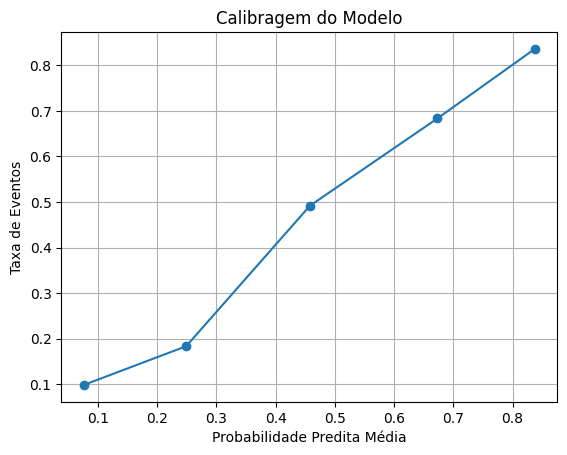

In [15]:
# Calcular a probabilidade predita
df['prob_evento'] = modelo_logistico.predict()

# Categorizar a probabilidade em 5 grupos
df['grupo_prob'] = pd.qcut(df['prob_evento'], 5)

# Calcular a probabilidade média predita e a taxa
calibragem = df.groupby('grupo_prob').agg(
    prob_evento_medio=('prob_evento', 'mean'),
    taxa_eventos=('flag_doente', 'mean')
).reset_index()
print(calibragem)

# Gráfico de comparação
plt.plot(calibragem['prob_evento_medio'], calibragem['taxa_eventos'], marker='o')
plt.xlabel('Probabilidade Predita Média')
plt.ylabel('Taxa de Eventos')
plt.title('Calibragem do Modelo')
plt.grid(True)
plt.show()

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [17]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Acurácia
acuracia = accuracy_score(df['flag_doente'], (df['prob_evento'] > 0.5).astype(int))
print(f"Acurácia: {acuracia:.2f}")

# GINI
roc_auc = roc_auc_score(df['flag_doente'], df['prob_evento'])
gini = 2 * roc_auc - 1
print(f"GINI: {gini:.2f}")

# KS
fpr, tpr, thresholds = roc_curve(df['flag_doente'], df['prob_evento'])
ks = max(tpr - fpr)
print(f"KS: {ks:.2f}")

Acurácia: 0.78
GINI: 0.66
KS: 0.58


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [21]:
# Teste de melhoria
modelo_melhorado = smf.logit('flag_doente ~ sex + cp + trestbps + age + chol + thalach', data=df).fit()
print(modelo_melhorado.summary())

Optimization terminated successfully.
         Current function value: 0.463802
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                            6
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.3276
Time:                        14:33:24   Log-Likelihood:                -140.53
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 4.479e-27
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.2971      2.184     -2.425      0.015      -9.577      -1.017
sex            2.0642      0.

### Teste de melhoria:
* Além das variáveis já analisadas (sexo, tipo de dor no peito, pressão arterial e idade), o colesterol e a frequência cardíaca máxima também se tornam importantes. A idade perde um pouco a importância quando outras variáveis foraam adicionadas, indicando que os efeitos de idade e colesterol / frequêcia cardíaca se sobrepõem.